In [3]:

%load_ext autoreload
%autoreload 2

In [4]:
import sys, os
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [5]:

root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.insert(0, root_path)

from data_preprocessing import DataPreprocessing
#from plotting import Plotting

### Data processing

In [6]:
my_data = DataPreprocessing()

In [7]:
data = my_data.read_data("../data/synthetic_product_listings_gpt_4o_mini.csv")

In [8]:
data

,product_id,category,brand,condition,price,seller_reputation,description,suspected_fraud
0,2,Clothing,Adidas,used,75.00,4,Brand new Adidas running shorts,True
1,3,Electronics,Apple,used,1299.99,2,Brand new Apple iPhone 14 Pro with 256GB storage,False
2,4,Furniture,Joybird,used,1200.00,5,Stylish Joybird mid-century modern sofa with p...,False
3,5,Furniture,IKEA,New,350.00,4,Brand new IKEA Hemnes dresser with 6 drawers.,False
4,6,Furniture,West Elm,New,3200.00,3,Brand new West Elm mid-century dining table in...,True
...,...,...,...,...,...,...,...,...
995,996,Furniture,West Elm,used,1750.00,3,Brand new West Elm mid-century style dining ta...,False
996,997,Electronics,LG,New,1200.00,1,Brand new LG OLED55CXPUA Alexa Built-In OLED TV,False
997,998,Clothing,Adidas,New,75.00,5,"Brand new Adidas Ultraboost running shoes, per...",True
998,999,Electronics,Dell,New,1200.00,3,Brand new Dell XPS 13 laptop with 16GB RAM and...,False


In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,product_id,price,seller_reputation
count,1000.000000,1000.000000,1000.000000
mean,502.307000,991.866380,3.022000
std,288.328677,868.386227,1.399813
min,2.000000,45.000000,1.000000
25%,252.750000,120.000000,2.000000
50%,504.500000,1200.000000,3.000000
75%,751.250000,1399.990000,4.000000
max,1001.000000,3500.000000,5.000000


In [11]:
data.product_id.value_counts()

product_id
212     2
816     2
598     2
505     2
693     2
       ..
342     1
343     1
344     1
345     1
1000    1
Name: count, Length: 995, dtype: int64

In [12]:
my_data.drop_duplicates('product_id')

,product_id,category,brand,condition,price,seller_reputation,description,suspected_fraud
0,2,Clothing,Adidas,used,75.00,4,Brand new Adidas running shorts,True
1,3,Electronics,Apple,used,1299.99,2,Brand new Apple iPhone 14 Pro with 256GB storage,False
2,4,Furniture,Joybird,used,1200.00,5,Stylish Joybird mid-century modern sofa with p...,False
3,5,Furniture,IKEA,New,350.00,4,Brand new IKEA Hemnes dresser with 6 drawers.,False
4,6,Furniture,West Elm,New,3200.00,3,Brand new West Elm mid-century dining table in...,True
...,...,...,...,...,...,...,...,...
995,996,Furniture,West Elm,used,1750.00,3,Brand new West Elm mid-century style dining ta...,False
996,997,Electronics,LG,New,1200.00,1,Brand new LG OLED55CXPUA Alexa Built-In OLED TV,False
997,998,Clothing,Adidas,New,75.00,5,"Brand new Adidas Ultraboost running shoes, per...",True
998,999,Electronics,Dell,New,1200.00,3,Brand new Dell XPS 13 laptop with 16GB RAM and...,False


In [13]:
my_data.data.product_id.value_counts()

product_id
2       1
676     1
662     1
663     1
664     1
       ..
342     1
343     1
344     1
345     1
1000    1
Name: count, Length: 995, dtype: int64

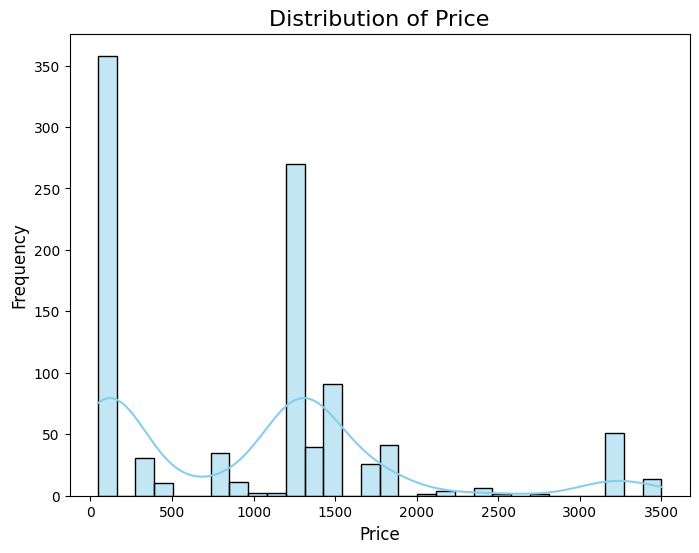

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(8, 6))  # Set figure size

# Plotting the histogram using seaborn
sns.histplot(my_data.data['price'], bins=30, kde=True, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


In [18]:
import numpy as np

my_data.data.loc[:, 'log_price'] = np.log1p(my_data.data['price'])



In [19]:
my_data.data.to_csv('../data/processed_data/synthetic_product_listings_gpt_4o_mini.csv', index=False)

In [23]:
import pandas as pd
d = pd.read_csv('../data/processed_data/synthetic_product_listings_gpt_4o_mini.csv')  
d.head()

,product_id,category,brand,condition,price,seller_reputation,description,suspected_fraud,log_price
0,2,Clothing,Adidas,used,75.00,4,Brand new Adidas running shorts,True,4.330733
1,3,Electronics,Apple,used,1299.99,2,Brand new Apple iPhone 14 Pro with 256GB storage,False,7.170881
2,4,Furniture,Joybird,used,1200.00,5,Stylish Joybird mid-century modern sofa with p...,False,7.090910
3,5,Furniture,IKEA,New,350.00,4,Brand new IKEA Hemnes dresser with 6 drawers.,False,5.860786
4,6,Furniture,West Elm,New,3200.00,3,Brand new West Elm mid-century dining table in...,True,8.071219
